# Multiclass Classification

When you have more than two classes (3-n) as an option, it is known as **multi-class classification**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.style.use('dark_background')

In [30]:
# The data is already sorted
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
# Add validation data
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.15, random_state=42)

### Getting Familiar w/ the data

In [15]:
# Labels are in the range [0, 9]
class_names = {
    0:	"T-shirt/top",
    1:	"Trouser",
    2:	"Pullover",
    3:	"Dress",
    4:	"Coat",
    5:	"Sandal",
    6:	"Shirt",
    7:	"Sneaker",
    8:	"Bag",
    9:	"Ankle boot"
}
# Show first training example
print("Training Samples")
print(train_data[0])
print("Training Labels")
print(train_labels[0])

Training Samples
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [7]:
# Check the shape of a single example
print(train_data[0].shape)

(28, 28)


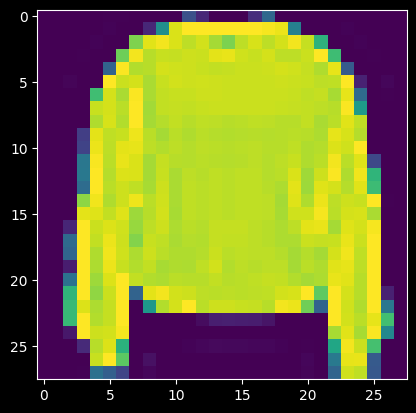

In [9]:
# Plot a single sample
plt.imshow(train_data[7])

In [14]:
# Check the sample label
print(class_names[train_labels[7]])

Pullover


Text(0.5, 1.0, 'T-shirt/top')

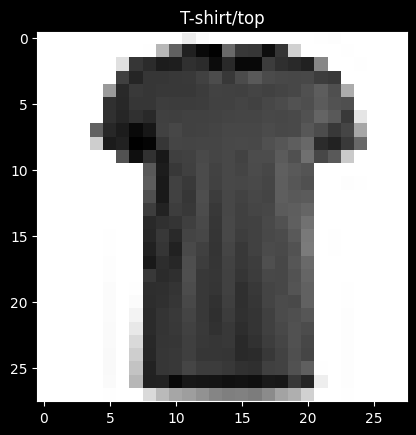

In [16]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

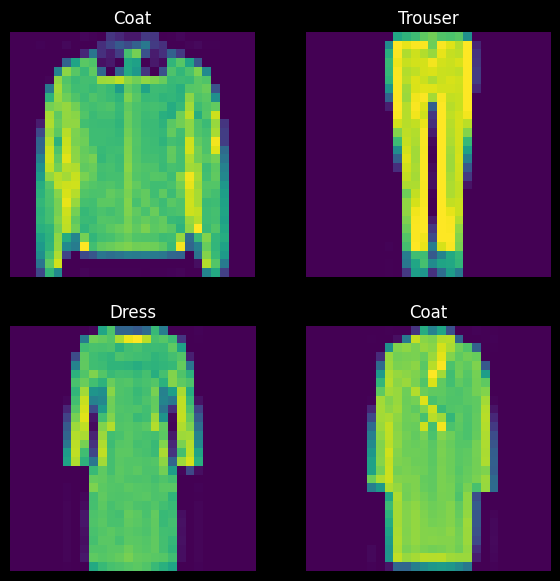

In [32]:
# Plot Multiple random images of the dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index])
    plt.title(class_names[train_labels[rand_index]])
    plt.axis('off')

### Building a multiclass classification model

For our multiclass classification model, we can use a similar architecture as the binary classification, however , we need to make some changes

- Input Shape = 28X28 (the shape of one image)
- Output Shape = 10 (one per class of clothing)
- Output Activation function =  Softmax (not sigmoid)
- Loss function = tf.keras.losses.CategoricalCrossentrophy()

In [43]:
# Build a model
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model_1.compile(
    optimizer='adam',
    # sparse_categorical_crossentropy for multiclass classification 
    # when values are not one hot encoded
    # if labels are one hot encoded, use categorical_crossentropy
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Fit the model
non_norm_history = model_1.fit(
    train_data, 
    tf.one_hot(train_labels, depth=10),
    epochs=10, 
    validation_data=(val_data, tf.one_hot(val_labels, depth=10))
)

Epoch 1/10
1594/1594 [==============================] - 2s 917us/step - loss: 2.4052 - accuracy: 0.0982 - val_loss: 2.3021 - val_accuracy: 0.1028
Epoch 2/10
1594/1594 [==============================] - 1s 930us/step - loss: 2.2948 - accuracy: 0.1033 - val_loss: 2.2602 - val_accuracy: 0.1272
Epoch 3/10
1594/1594 [==============================] - 1s 825us/step - loss: 2.2373 - accuracy: 0.1297 - val_loss: 2.2097 - val_accuracy: 0.1407
Epoch 4/10
1594/1594 [==============================] - 1s 856us/step - loss: 2.1593 - accuracy: 0.1572 - val_loss: 2.0759 - val_accuracy: 0.1953
Epoch 5/10
1594/1594 [==============================] - 1s 887us/step - loss: 1.9023 - accuracy: 0.2215 - val_loss: 1.7970 - val_accuracy: 0.2290
Epoch 6/10
1594/1594 [==============================] - 1s 873us/step - loss: 1.7557 - accuracy: 0.2325 - val_loss: 1.7523 - val_accuracy: 0.2488
Epoch 7/10
1594/1594 [==============================] - 1s 854us/step - loss: 1.7019 - accuracy: 0.2576 - val_loss: 1.6578 -

In [38]:
# Check the model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Check min and max values of traqining data
np.min(train_data), np.max(train_data)

(0, 255)

Remember Neurak networks prefer data to be scales (or normalized), this mean they like to have numbers in the tensors they try to define patterns in between 0 and 1

In [45]:
# We can see that the data is in the range [0, 255]
# We can get our training and testing data between 0 & 1 by dividing by the maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
val_data_norm = val_data / 255.0

# Check the min and max values of the scaled training data  
np.min(train_data_norm), np.max(train_data_norm)

(0.0, 1.0)

In [46]:
# Rebuild the same model but with scaled data

# Build a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Fit the model
norm_history = model_2.fit(
    train_data_norm, 
    tf.one_hot(train_labels, depth=10),
    epochs=10, 
    validation_data=(val_data_norm, tf.one_hot(val_labels, depth=10))
)

Epoch 1/10
1594/1594 [==============================] - 2s 847us/step - loss: 1.4453 - accuracy: 0.4760 - val_loss: 1.0734 - val_accuracy: 0.5849
Epoch 2/10
1594/1594 [==============================] - 1s 786us/step - loss: 0.9412 - accuracy: 0.6586 - val_loss: 0.8636 - val_accuracy: 0.6926
Epoch 3/10
1594/1594 [==============================] - 1s 783us/step - loss: 0.7894 - accuracy: 0.7207 - val_loss: 0.7713 - val_accuracy: 0.7284
Epoch 4/10
1594/1594 [==============================] - 1s 792us/step - loss: 0.7037 - accuracy: 0.7618 - val_loss: 0.6897 - val_accuracy: 0.7709
Epoch 5/10
1594/1594 [==============================] - 1s 777us/step - loss: 0.6447 - accuracy: 0.7869 - val_loss: 0.6566 - val_accuracy: 0.7792
Epoch 6/10
1594/1594 [==============================] - 1s 787us/step - loss: 0.6116 - accuracy: 0.7949 - val_loss: 0.6258 - val_accuracy: 0.7908
Epoch 7/10
1594/1594 [==============================] - 1s 771us/step - loss: 0.5893 - accuracy: 0.8041 - val_loss: 0.6185 -

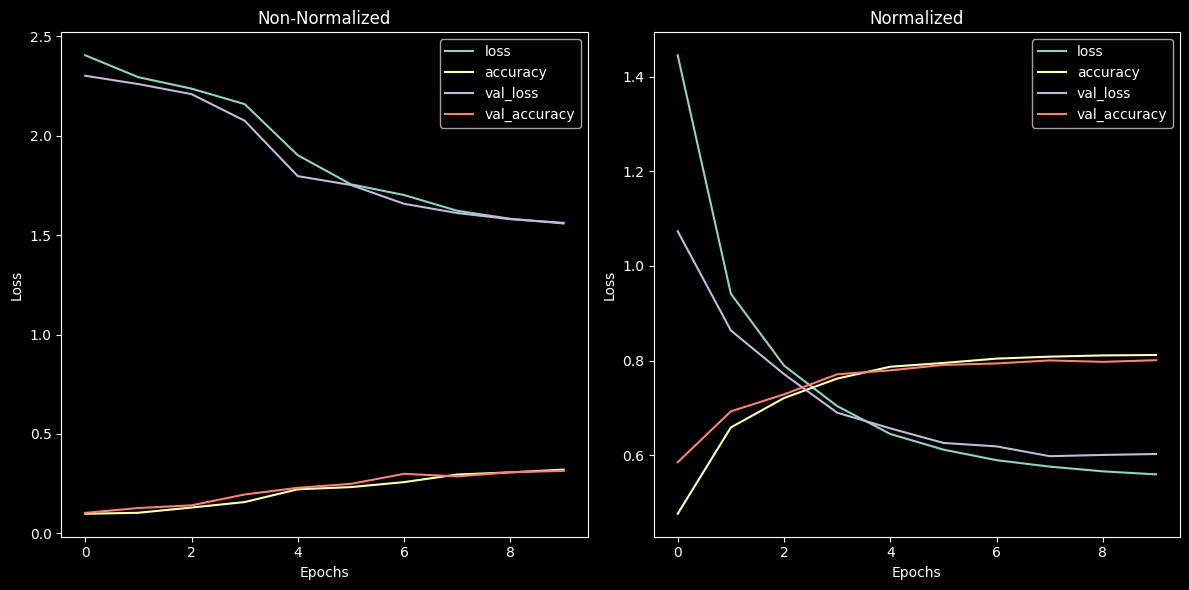

In [50]:
# Plot the two models
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first graph in the left subplot
pd.DataFrame(non_norm_history.history).plot(ax=axes[0], title="Non-Normalized")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

# Plot the second graph in the right subplot
pd.DataFrame(norm_history.history).plot(ax=axes[1], title="Normalized")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")

# Display the plots
plt.tight_layout()
plt.show()

When comparing the results of the same model with even slightly different data can produce **dramatically** different results. So when you are comparing models, its important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

### Finding the Ideal Learning Rate

In [54]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(
    optimizer='adam', # default learning rate of adams is 0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Creat Learning Rate Callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: 1e-3 * 10**(epoch/20))

# Fit the model
history_3 = model_3.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=40,
    validation_data=(val_data_norm, tf.one_hot(val_labels, depth=10)),
    callbacks=[learning_rate_scheduler]
)


Epoch 1/40
1594/1594 [==============================] - 2s 936us/step - loss: 1.2574 - accuracy: 0.4863 - val_loss: 0.9570 - val_accuracy: 0.6256 - lr: 0.0010
Epoch 2/40
1594/1594 [==============================] - 1s 893us/step - loss: 0.8605 - accuracy: 0.6672 - val_loss: 0.8305 - val_accuracy: 0.6718 - lr: 0.0011
Epoch 3/40
1594/1594 [==============================] - 1s 863us/step - loss: 0.7723 - accuracy: 0.6901 - val_loss: 0.7706 - val_accuracy: 0.6924 - lr: 0.0013
Epoch 4/40
1594/1594 [==============================] - 1s 858us/step - loss: 0.7334 - accuracy: 0.7042 - val_loss: 0.7356 - val_accuracy: 0.7029 - lr: 0.0014
Epoch 5/40
1594/1594 [==============================] - 1s 842us/step - loss: 0.6917 - accuracy: 0.7369 - val_loss: 0.6763 - val_accuracy: 0.7568 - lr: 0.0016
Epoch 6/40
1594/1594 [==============================] - 1s 874us/step - loss: 0.6445 - accuracy: 0.7702 - val_loss: 0.6276 - val_accuracy: 0.7794 - lr: 0.0018
Epoch 7/40
1594/1594 [========================

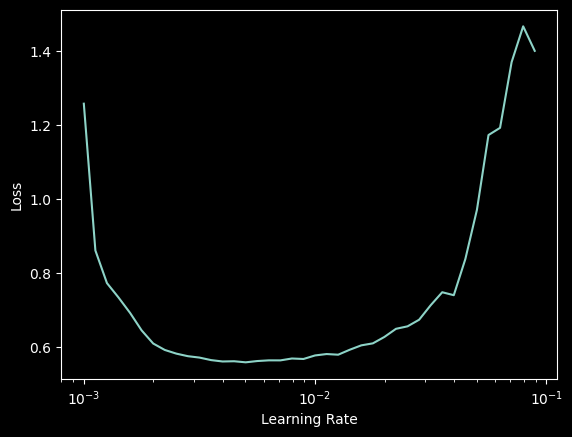

In [55]:
# Plot the learning rate dicay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

In [56]:
10**-3

0.001

In [57]:
# Refit the model for the ideal learning rate
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history_4 = model_4.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=40,
    validation_data=(val_data_norm, tf.one_hot(val_labels, depth=10))
)

Epoch 1/40
1594/1594 [==============================] - 2s 1ms/step - loss: 1.2402 - accuracy: 0.5442 - val_loss: 0.8847 - val_accuracy: 0.6727
Epoch 2/40
1594/1594 [==============================] - 1s 903us/step - loss: 0.7444 - accuracy: 0.7324 - val_loss: 0.7035 - val_accuracy: 0.7356
Epoch 3/40
1594/1594 [==============================] - 1s 918us/step - loss: 0.6530 - accuracy: 0.7642 - val_loss: 0.6478 - val_accuracy: 0.7627
Epoch 4/40
1594/1594 [==============================] - 1s 938us/step - loss: 0.6152 - accuracy: 0.7781 - val_loss: 0.6317 - val_accuracy: 0.7718
Epoch 5/40
1594/1594 [==============================] - 1s 927us/step - loss: 0.5927 - accuracy: 0.7865 - val_loss: 0.6198 - val_accuracy: 0.7780
Epoch 6/40
1594/1594 [==============================] - 1s 917us/step - loss: 0.5769 - accuracy: 0.7957 - val_loss: 0.5917 - val_accuracy: 0.7852
Epoch 7/40
1594/1594 [==============================] - 1s 923us/step - loss: 0.5665 - accuracy: 0.8000 - val_loss: 0.6240 - v

## Evaluating our multi-class classification model

To evaluate our model we could:

- Evaluate its performance using other classification metrics such as a confusion matrix
- Asses some of its predictions through visualization
- Imporve its  results by training it for longer or changing the architecture
- Save and export it for use in an application



In [80]:
# Creeate a confusion matrix
# Create Confusion Matrix Plot

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=6):
   
    # Create a confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalized Confusion Matrix to get percentages
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Get counfusion matrix shape
    n_class = cm.shape[0]

    # Get figure and axes of subplot
    fig, ax = plt.subplots(figsize=figsize)

    # Create Matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label axes    
    ax.set(title='Confusion Matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_class),
        yticks=np.arange(n_class),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size+5)
    ax.xaxis.label.set_size(text_size+5)
    ax.title.set_size(text_size+10)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text of each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
        )
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [60]:
# Make some predictions with the model
y_probs = model_4.predict(test_data_norm) # probs is short for prediction probabilities
y_probs

313/313 [==============================] - 0s 622us/step


array([[3.9431188e-06, 4.0276967e-16, 5.9959667e-08, ..., 9.3567885e-02,
        1.1517858e-02, 7.0527482e-01],
       [1.1887150e-03, 1.8855051e-16, 9.3469727e-01, ..., 3.9545017e-29,
        3.3047834e-07, 2.5407150e-13],
       [1.4158568e-05, 9.9606627e-01, 2.1197561e-09, ..., 3.7817920e-25,
        6.9642340e-07, 1.5258010e-21],
       ...,
       [1.8899255e-01, 6.4692330e-08, 4.9798442e-03, ..., 3.9710263e-11,
        6.5153706e-01, 5.8860646e-06],
       [2.1544949e-05, 9.9170309e-01, 5.7684851e-10, ..., 5.6258012e-30,
        2.6914290e-07, 1.7046868e-24],
       [1.0356084e-05, 7.2397874e-09, 4.5885208e-06, ..., 7.7228315e-02,
        1.7471527e-03, 3.2760629e-03]], dtype=float32)

In [62]:
# Show predictions for first image
for i in range(10):
    print(f"{class_names[i]}: {y_probs[0][i]:.3f}")

T-shirt/top: 0.000
Trouser: 0.000
Pullover: 0.000
Dress: 0.000
Coat: 0.000
Sandal: 0.190
Shirt: 0.000
Sneaker: 0.094
Bag: 0.012
Ankle boot: 0.705


In [63]:
# Put Predictions in the same format as the test labels by converting probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

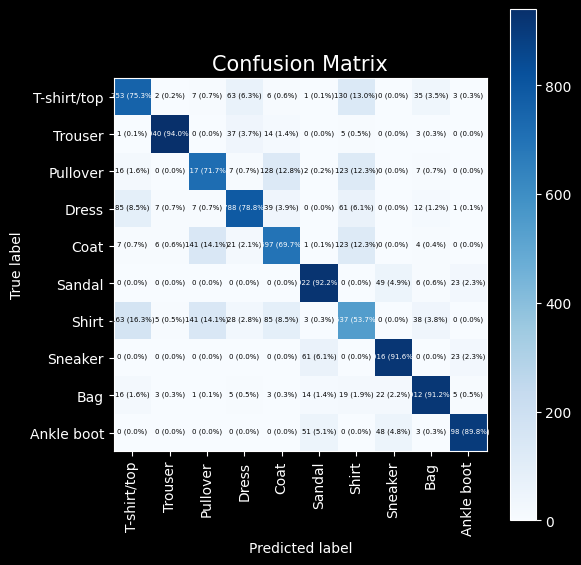

In [81]:
# Plot the confusion matrix
make_confusion_matrix(
    test_labels, 
    y_preds, 
    class_names.values(),
    figsize=(6, 6),
    text_size=5
)

**Note:** Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop a futher understanding of the data and the inputs and outputs of your models

Lets: 
- Plot a random image
- Make a prediction on the image
- Label the plot with the truth & prediction label

In [102]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    # create predictions and targets
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_prob.argmax()]
    true_labels = classes[true_labels[i]]
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    plt.title(
        f"Predicted: {pred_label} {100*pred_prob.max():.0f}%, True: {true_labels}", 
        color='red' if pred_label != true_labels else 'green'
    )

1/1 [==============================] - 0s 13ms/step


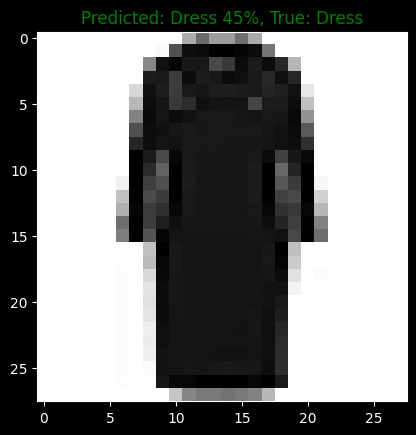

In [137]:
plot_random_image(model_4, test_data_norm, test_labels, class_names)

### What patterns is our model learning?

In [138]:
# Find the layers of our own recent model
model_4.layers

In [140]:
# Extract a particular layer
model_4.layers[1]

In [141]:
# Get the patterns of a layer uin our network by getting weights and biases
weights, biases = model_4.layers[1].get_weights()

# Look at weights
weights, weights.shape

(array([[ 0.6572355 , -1.1016008 , -0.23904268,  0.51361364],
        [ 0.80725336, -1.371056  , -0.0154397 ,  1.3096304 ],
        [ 1.9637471 , -1.7940773 , -0.8779027 ,  0.7932915 ],
        ...,
        [-0.01014115, -0.17906332, -0.45968595, -0.28215915],
        [ 0.21025038, -0.8074226 , -0.04728056,  0.38911965],
        [ 0.5026284 ,  0.02376041, -0.27031356,  1.6768689 ]],
       dtype=float32),
 (784, 4))

Every Neuron has a bias vector. each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a Tensorflow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer

In [142]:
# Now look at the bias vector
biases, biases.shape

(array([0.7212709 , 1.8371607 , 0.35060894, 2.421665  ], dtype=float32), (4,))

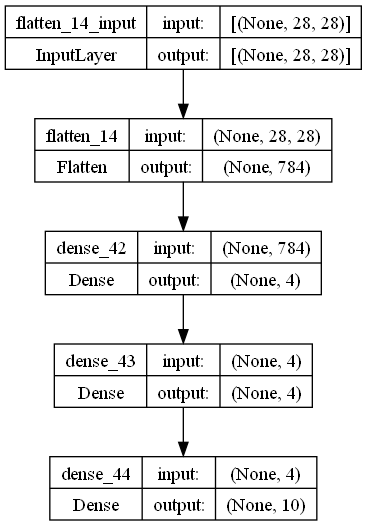

In [143]:
from tensorflow.keras.utils import plot_model
# See inputs and outputs of each layer
plot_model(model_4, show_shapes=True)